In [6]:
#setup
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
# read edge list
g = nx.read_edgelist("demog1.txt")
ug = nx.to_undirected(g)
# print basic info (is the graph ok?)
print(nx.info(ug))

Name: 
Type: GraphView
Number of nodes: 205
Number of edges: 333
Average degree:   3.2488


In [ ]:
%%!
pip install community

number of noeds: 205
number of edges: 333
Diameter: None
Average degree: 3.2487804878048783


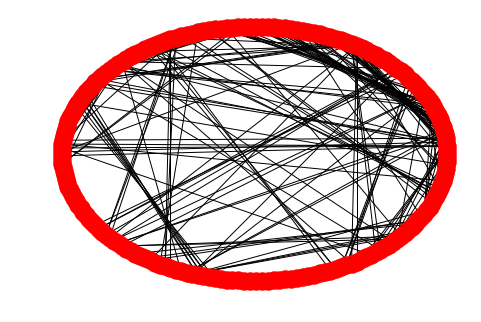

In [8]:
# basic analysis
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# number of nodes
print("number of noeds:",nx.number_of_nodes(ug))

#number of edges
print("number of edges:",nx.number_of_edges(ug))

#average clustering
nx.average_clustering(ug)

# diameter
print("Diameter:",nx.draw_circular(ug))
# this diameter shows ...

# average degree
sum = 0
for n in ug.nodes():
    sum = sum + ug.degree(n)
print("Average degree:", sum/ug.number_of_nodes())

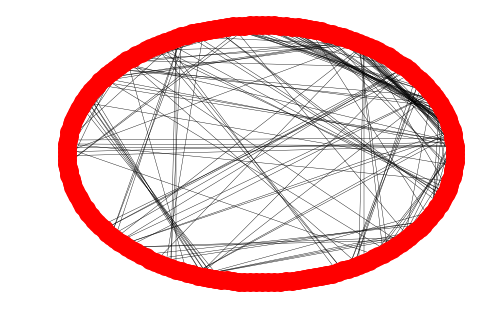

In [9]:
options = {
    'node_color': 'red',
    'node_size': 100,
    'line_color':'blue',
    'linewidths': 9,
    'width': 0.4,'linesize':0.9}
nx.draw_circular(ug, **options)
plt.savefig ("simple_graph.png")

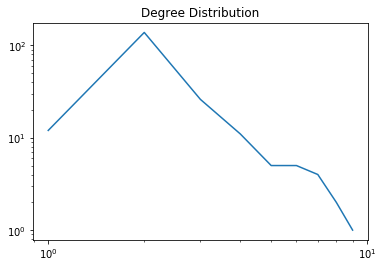

In [10]:
# taken from SNAP Tutorial
def plot_degree_distribution (wiki) :
    degs = {}
    for n in wiki.nodes () :
        deg = wiki.degree ( n )
        
        
        if deg not in degs :
            degs [ deg ] = 0
        
        degs [ deg ] += 1
    items = sorted ( degs.items () )
            
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig ("degree_distribution.png")
    
g = nx.read_edgelist("edge.txt")            
plot_degree_distribution(g)

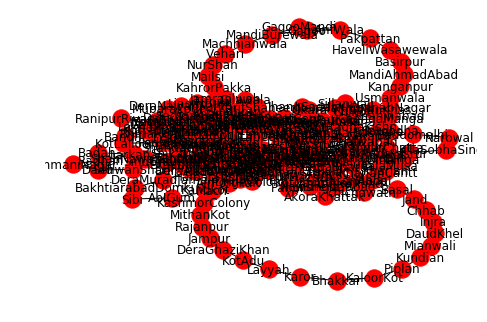

In [12]:
# draw a network with labels
options = {
    'node_color': 'Green',
    'node_size': 0.5,
    'line_color': 'Yellow',
    'linewidths': 0.5,
    'width': 0.5,
}
nx.draw_kamada_kawai(ug, with_labels=True)

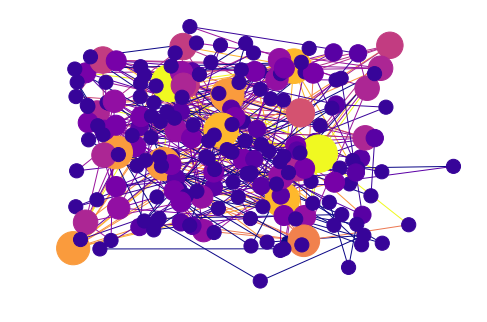

In [13]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug.nodes():
    d.append(ug.degree(n))
    
ec = [] # create a set
for e in ug.edges():
    if(ug.degree(e[0]) > ug.degree(e[1])):
        ec.append(ug.degree(e[0]))
    else:
        ec.append(ug.degree(e[1]))
    
pos = nx.spring_layout(ug, iterations=1)

factor = 100 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d]) # node sizse

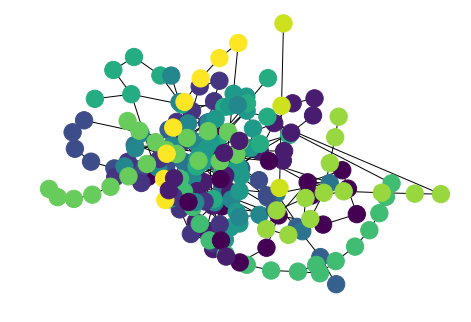

In [14]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(ug, partition, scale=5.)

    pos_nodes = _position_nodes(ug, partition, scale=5.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


from community import community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
ug = nx.read_edgelist("edge.txt")
partition = community_louvain.best_partition(ug)
pos = community_layout(ug, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug,pos, node_color=cols, with_labels=False); 
plt.show()


Node Degree
LAHOREJN []
QILASHEIKHUPURA []
SANGLAHILL []
FAISALABAD []
GOJRA []
TOBATEKSINGH []
SHORKOTCANTTJN []
KHANEWALJN []
JAHANIA []
LODHRANJN []
BAHAWALPUR []
DERANAWABSAHIB []
LIAQUATPUR []
KHANPURJN []
RAHIMYARKHAN []
SADIKABAD []
DAHARKI []
MIRPURMATHELO []
GHOTKI []
PANOAKIL []
ROHRIJN []
SUKKUR []
SHIKARPUR []
JACOBABADJN []
DERAALLAHYAR []
DERAMURADJAMALI []
BAKHTIARABADDOMKI []
SIBIJN []
AB-I-GUM []
MACH []
KOLPUR []
QUETTA []
SIALKOTJN []
CHAWINDA []
PASRUR []
KILASOBHASINGH []
NAROWALJN []
BADDOMALHI []
NARANG []
SHAHDARABAGHJN []
KOTLAKHPAT []
RAIWINDJN []
KOTRADHAKISHEN []
PATTOKI []
OKARA []
SAHIWAL []
CHICHAWATNI []
DUNYAPUR []
MAHRABPUR []
NAWABSHAHJN []
TANDOADAM []
HYDERABADJN []
KOTRIJN []
LANDHIJN []
DRIGHROAD []
KARACHICANTT []
ATTOCKCITYJN []
JHALAR []
SULAIMANABAD []
BASALJN []
DOMEL []
NAMMAL []
CHURSHARIF(HALT) []
LANGAR []
JANDJN []
UCHHRI []
JHAMAT []
CHHAB []
KHATAKABAD []
INJRA []
MAKHADROAD []
SOHANBRIDGE []
MASSAN []
DAUDKHELJN []
MARIINDUS []
PESHAW

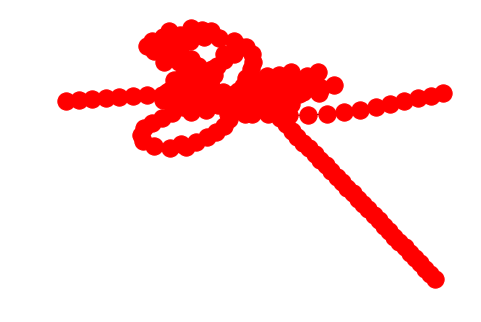

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
ug = nx.read_edgelist("edge.txt")
G = nx.karate_club_graph()
print("Node Degree")
for v in ug:
    print('%s %s' % (v, G.degree(v)))

nx.draw_kamada_kawai(ug, with_labels=False)
plt.show()

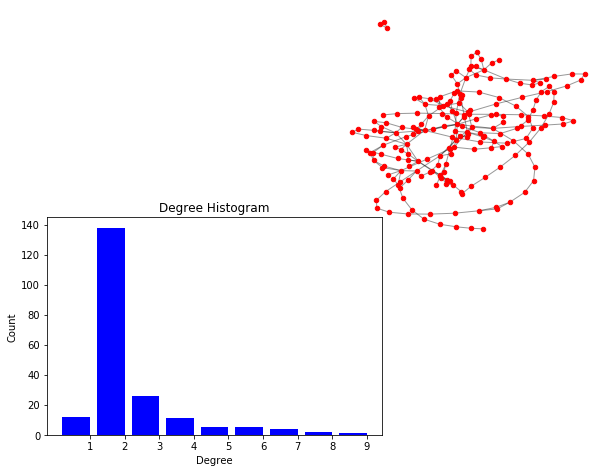

In [16]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

ug = nx.read_edgelist("edge.txt")

degree_sequence = sorted([d for n, d in ug.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.8, 0.8, 0.6, 0.8])
Gcc = sorted(nx.connected_component_subgraphs(ug), key=len, reverse=True)[0]
pos = nx.spring_layout(ug)
plt.axis('off')
nx.draw_networkx_nodes(ug, pos, node_size=20)
nx.draw_networkx_edges(ug, pos, alpha=0.4)

plt.show()